In [ ]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset 
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Information related to fields and records in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#Percentage of missing values per column
na_val=pd.DataFrame(df.isna().mean())
na_val

,0
eventid,0.000000
iyear,0.000000
imonth,0.000000
iday,0.000000
approxdate,0.949150
extended,0.000000
resolution,0.987781
country,0.000000
country_txt,0.000000
region,0.000000


In [ ]:
#Deleting columns with missing values greater than 20%
df=df.dropna(axis='columns',thresh=int(0.8*len(df)))
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
#Top 5 records in the updated dataset
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [ ]:
#Statistical info regarding the data
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,181691.000000,160923.000000,171378.000000,165380.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,6.447325,11.117162,2.403272,3.167668,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,2.173435,6.495612,11.545741,35.949392,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,6.000000,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,13.000000,31.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Correcting error values in month, day
df['imonth'] = df['imonth'].replace([0],np.nan)
df['imonth'] = df['imonth'].bfill(axis='rows')
df['iday'] = df['iday'].replace([0],np.nan)
df['iday'] = df['iday'].bfill(axis='rows')

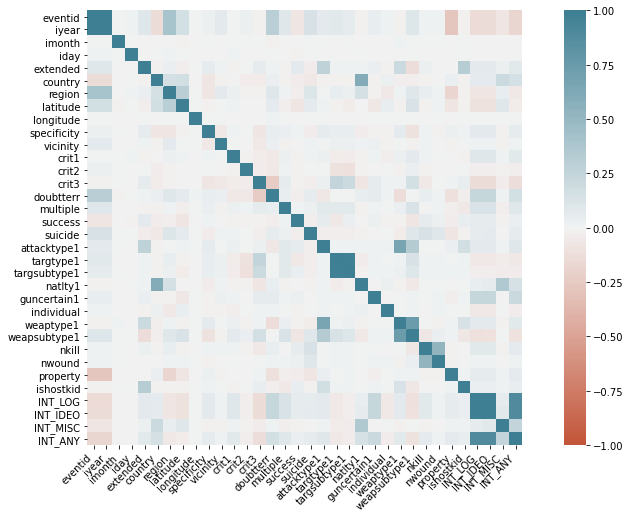

In [ ]:
#Correlation heatmap for existing columns
corr = df.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#Removing columns with high correlation
df=df.drop(columns=['targsubtype1','weapsubtype1','INT_IDEO','INT_ANY'])

In [ ]:
#EXPLORATORY ANALYSIS
#Different crime rates based on attack type and region
df.groupby(['attacktype1_txt','region_txt'])['region_txt'].count()

attacktype1_txt                      region_txt                 
Armed Assault                        Australasia & Oceania             51
                                     Central America & Caribbean     4361
                                     Central Asia                     116
                                     East Asia                        117
                                     Eastern Europe                  1274
                                     Middle East & North Africa      9273
                                     North America                    448
                                     South America                   3875
                                     South Asia                     11404
                                     Southeast Asia                  4022
                                     Sub-Saharan Africa              6004
                                     Western Europe                  1724
Assassination                        Australasi

In [ ]:
#Casualty count sorted by country
new1=df[df['nkill']>0]
a=new1.groupby(['country_txt'])['nkill'].count()
a.nlargest(10)

country_txt
Iraq              16050
Afghanistan        8706
Pakistan           6593
India              5339
Colombia           3578
Philippines        3154
Nigeria            2592
Somalia            2312
United Kingdom     2308
Peru               2219
Name: nkill, dtype: int64

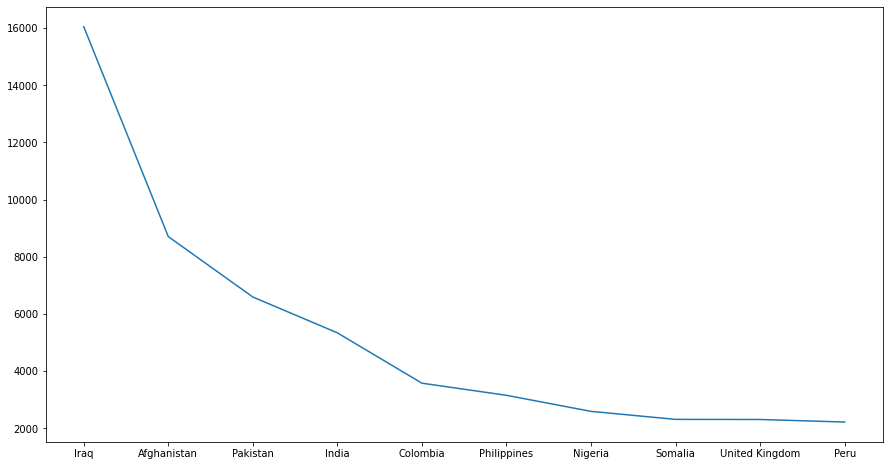

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(a.nlargest(10))
plt.show()

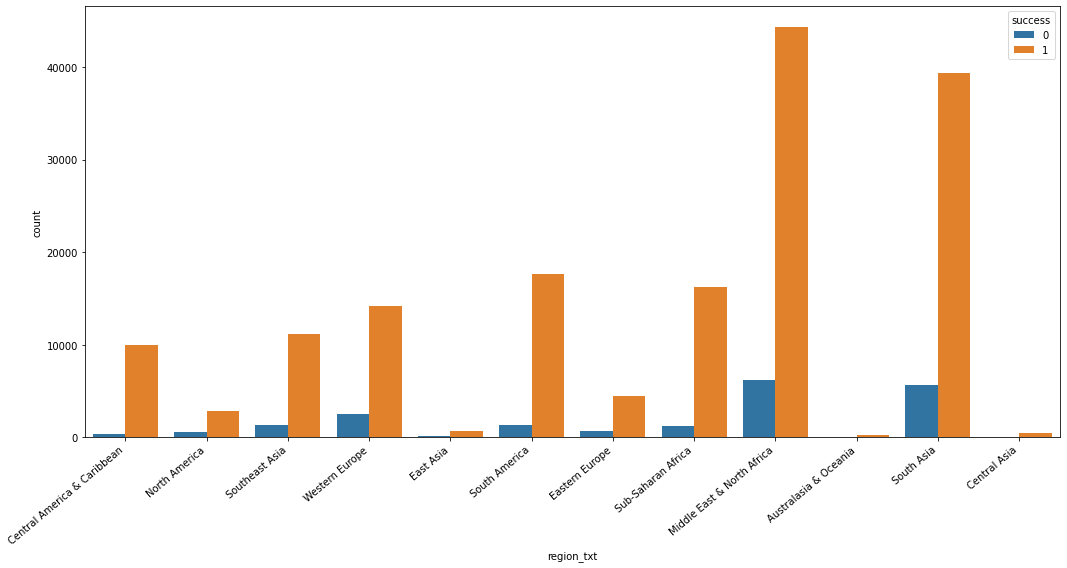

In [ ]:
#Plotting a graph for successful crimes based on region
plt.figure(figsize=(15,8))
ax = sns.countplot(x="region_txt", hue="success", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

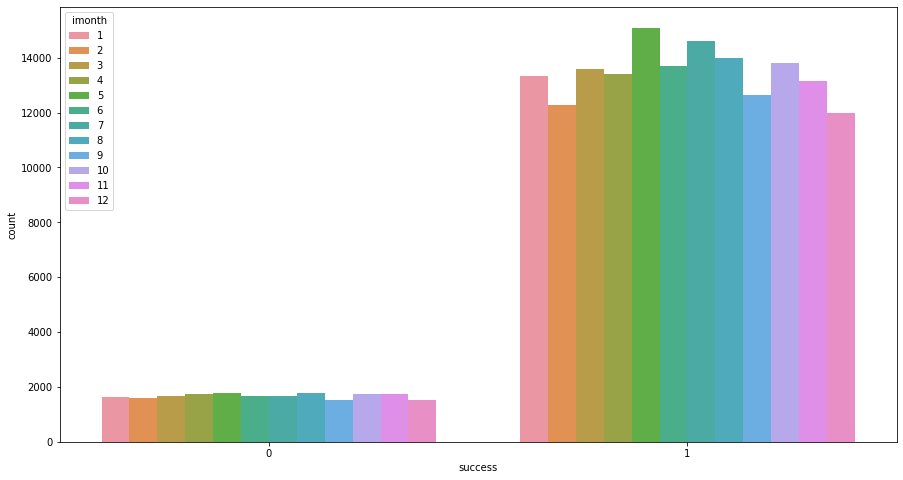

In [ ]:
#Plotting a graph for successful crimes based on month 
plt.figure(figsize=(15,8))
ax = sns.countplot(x="success", hue="imonth", data=df)

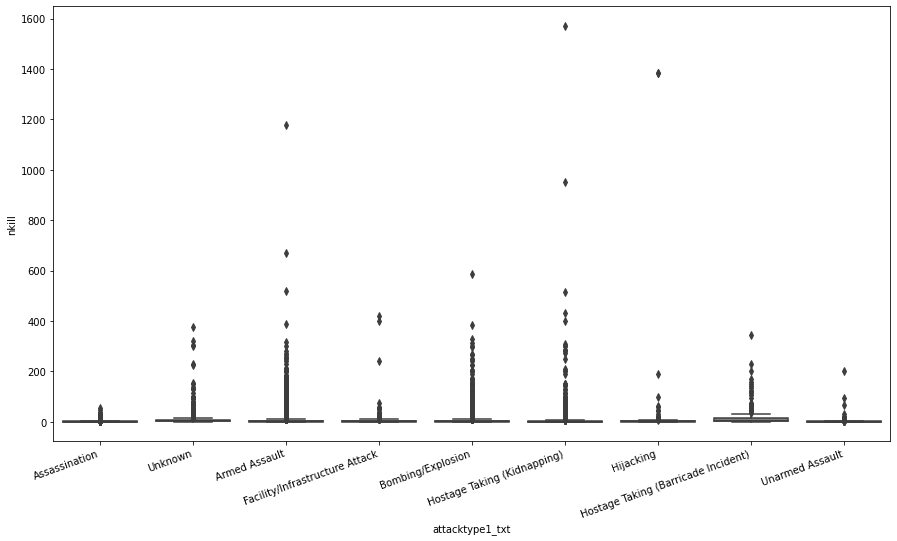

In [ ]:
#Box plot for casualty count based on different attack types
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="attacktype1_txt", y="nkill", data=new1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

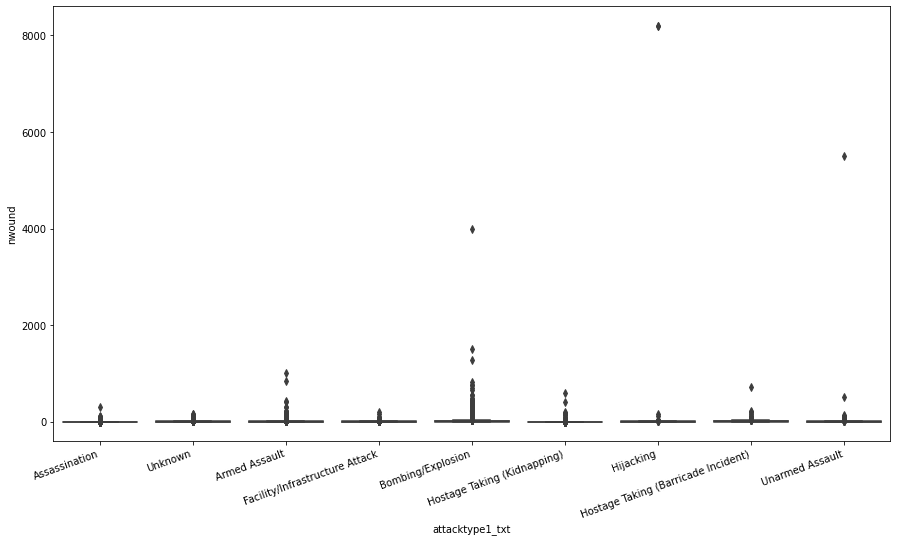

In [ ]:
#Box plot for injured count based on different attack types
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="attacktype1_txt", y="nwound", data=new1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [ ]:
#Removing outliers for accurate representation
Q1 = new1.nkill.quantile(0.25)
Q3 = new1.nkill.quantile(0.75)
IQR = Q3 - Q1
new1 = new1[(new1.nkill >= Q1 - 1.5*IQR) & (new1.nkill <= Q3 + 1.5*IQR)]

Q1 = new1.nwound.quantile(0.25)
Q3 = new1.nwound.quantile(0.75)
IQR = Q3 - Q1
new1 = new1[(new1.nwound >= Q1 - 1.5*IQR) & (new1.nwound <= Q3 + 1.5*IQR)]

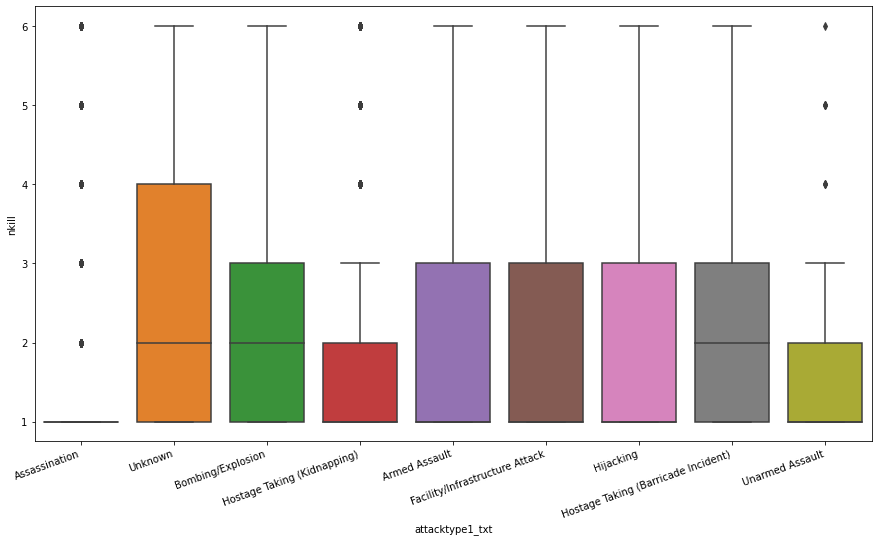

In [ ]:
#Updated box plot for casualty count based on different attack types
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="attacktype1_txt", y="nkill", data=new1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

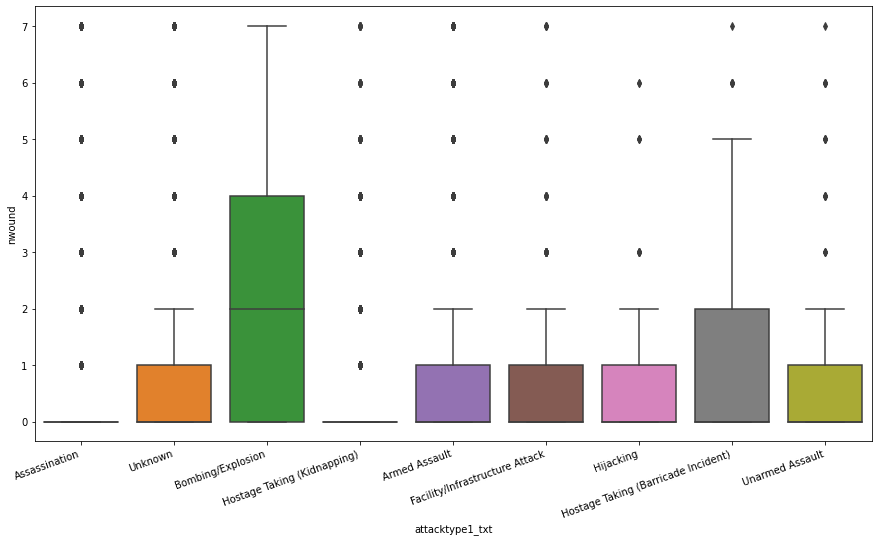

In [ ]:
#Updated box plot for injured count based on different attack types
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="attacktype1_txt", y="nwound", data=new1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [ ]:
#Drawing parallels between death by suicide and killed for each type of attack
df.groupby(['attacktype1_txt','suicide'])['nkill'].agg(["sum","mean","median"])

sum        mean  median
attacktype1_txt                     suicide                              
Armed Assault                       0        159823.0    3.965438     1.0
                                    1           474.0    9.673469     8.0
Assassination                       0         23374.0    1.232091     1.0
                                    1          1546.0    5.900763     3.0
Bombing/Explosion                   0         98677.0    1.261612     0.0
                                    1         58644.0    9.602751     5.0
Facility/Infrastructure Attack      0          3640.0    0.371922     0.0
                                    1             2.0    2.000000     2.0
Hijacking                           0           657.0    1.104202     0.0
                                    1          3061.0  278.272727     7.0
Hostage Taking (Barricade Incident) 0          2962.0    3.509479     0.0
                                    1          1516.0   28.074074    11.5
Hostage Taking (Kidnapping)         0         22270.0    2.597690     0.0
                                    1          1961.0   53.000000    16.0
Unarmed Assault                     0           873.0    0.873874     0.0
                                    1             7.0    3.500000     3.5
Unknown                             0         32379.0    4.932064     1.0
                                    1             2.0    1.000000     1.0

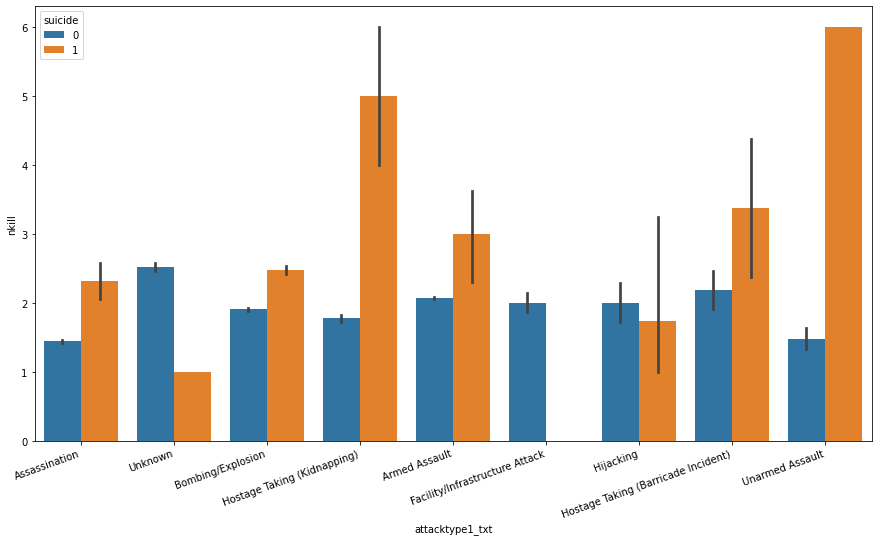

In [ ]:
#Plotting trends between casualty count and suicide count
plt.figure(figsize=(15,8))
ax = sns.barplot(x="attacktype1_txt", y="nkill",hue="suicide",data=new1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()